<a href="https://colab.research.google.com/github/JohanEstebanCuervo/Color_Reproduction_Multiespectral_Images/blob/main/Pulse_Amplitude_Modulation_PAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias a utilizar

In [44]:
!pip install scikit-commpy

In [45]:
import numpy as np
import matplotlib.pyplot as plt

from commpy.modulation import QAMModem
from commpy.filters import rrcosfilter

# Funciones 

In [147]:
def Grafica_Pulse_Shaping(X,Y,title,legend=None):
  colores = ['black','green','purple','gray',]
  plt.figure(figsize=(16,9))
  plt.title(title,fontsize = 20)
  plt.xlabel('Muestras',fontsize = 14)
  plt.ylabel('Amplitud',fontsize = 14)
  plt.grid()

  if legend is None:
    legend=[]
    for i in range(len(X)):
      legend.append('None')

  for i,x in enumerate(X):
    y = Y[i]
    plt.plot(x,y,color=colores[i],label=legend[i])
    inicial = []
    t_i = []
    finales = []
    t_f = []
    for j,val in enumerate(x):
      if val%1==0:
        inicial.append(y[j])
        t_i.append(val)
      else:
        finales.append(y[j])
        t_f.append(val)

    
    markerline, stemlines, baseline = plt.stem(t_i,inicial, linefmt ='red', markerfmt ='D')
    plt.setp(baseline, 'linewidth', 1,'color','gray')
    plt.setp(markerline, markersize=10)
    markerline.set_markerfacecolor(colores[i]) 
    markerline.set_markeredgecolor(colores[i])

    markerline, stemlines, baseline = plt.stem(t_f,finales, linefmt ='gray')
    markerline.set_markerfacecolor('gray') 
    markerline.set_markeredgecolor('gray')
    plt.setp(baseline, 'linewidth', 1,'color','gray')


  if legend[0]!='None':
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left',fontsize = 14)

  plt.show()
  

#PULSE AMPLITUDE MODULATION

**BIT:** Elemento abstracto de información que representa unicamente dos estados: abierto-cerrado, vacio-lleno, negro-blanco. Generalmente en nuestra rama de estudio un 1 - 0.

**SÍMBOLO:** Elemento abstracto que representa información. En las comunicaciones un simbolo representa  generalmente una cantidad *N* de bits. Un simbolo puede hacer referencia a un color, amplitud, longitud de onda, fase, forma, etc. En general cualquier elemento que utilice para representar información.

**TASA DE TRANSMISIÓN DE BIT:** Cantidad de bits que se transmiten por segundo en una comunicación. dado en bit/s ó bps, ejemplo: 100Mbps, 3kbps

**TASA DE MUESTREO:** Es la Cantidad de muestras que representan un bit o símbolo, multiplicado por la tasa de transmisión de bits o símbolos por segundo, según sea el caso. ejemplo:

N= Muestras por bit
$$N=10$$
S= Velocidad de transmisión de bit
$$S= 2Mbps$$

$$T_M=N*S= 10 * 2Mbps$$
$$T_M= 20Mmuestras/s$$

**FORMA DE PULSO:** Es la forma que van a adquirir los bits o simbolos para sen transmitidos. En nuestro caso de estudio las dos formas de pulso de interes son pulso cuadrado y filtro del coseno realzado (RRC).

1. Pulso Cuadrado: Es la forma clásica de pulso para realizarla en python:



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


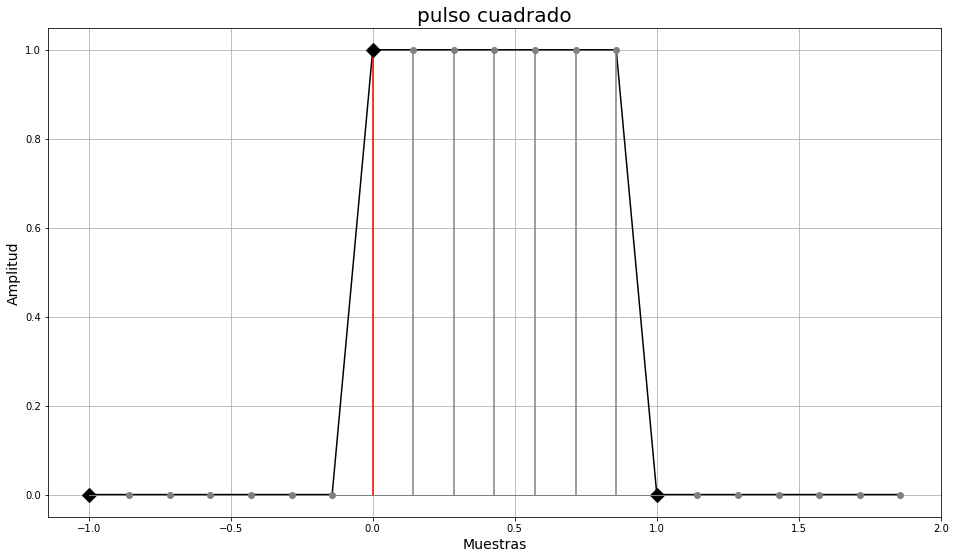

In [148]:
muestras_simbolo= 7

ps = np.concatenate((np.zeros(muestras_simbolo),np.ones(muestras_simbolo),np.zeros(muestras_simbolo)))
ts = np.linspace(-1,1+(muestras_simbolo-1)/muestras_simbolo,muestras_simbolo*3)

Grafica_Pulse_Shaping([ts],[ps],'pulso cuadrado')

En este ejemplo las barras rojas con símbolo en Rombo, representa la primera muestra de cada bit, en este caso se grafica las muestras anteriores y siguientes al pulso, en nuestro caso el 0. Como es natural el pulso cuadrado no influye en las muestras de los demás bits.

2. Filtro Raiz del coseno realzado:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


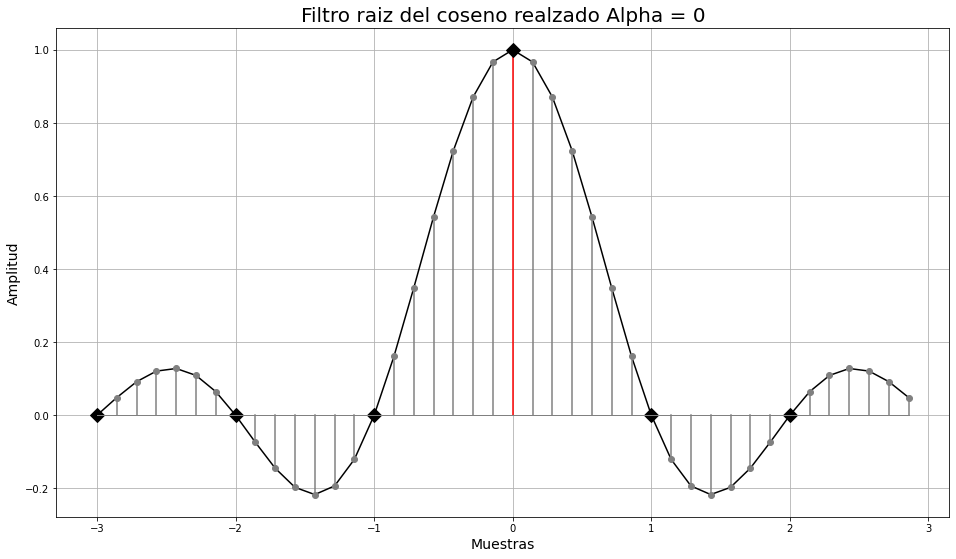

In [149]:
longitud_filtro_s= 6 # longitud del filtro en simbolos
longitud_filtro_m = longitud_filtro_s*muestras_simbolo  #Longitud del filtro en Muestras
alpha = 0 # Factor de caida del filtro
Ts =1 # Periodo del simbolo en segundos tasa de transmision de bit ^-1

Fs = muestras_simbolo/Ts  #Frecuencia de muestreo
RRC = rrcosfilter(longitud_filtro_m, alpha=alpha, Ts=Ts, Fs=Fs)

Grafica_Pulse_Shaping([RRC[0]],[RRC[1]],'Filtro raiz del coseno realzado Alpha = '+str(alpha))

En esta Gráfica se ve la forma del pulso para RRC. En este caso la forma de bit si afecta las muestras de los bits vecinos. Para nuestro caso de Alpha = 0 se puede observar que las primeras muestras de cada bit no se ven afectadas. Además en el proceso de diseño se puede escoger el número de bits que afecte la forma de pulso.

El factor Alpha afecta el ancho del lóbulo principal, Además también afecta el impacto en la muestra inicial de los bits vecinos.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

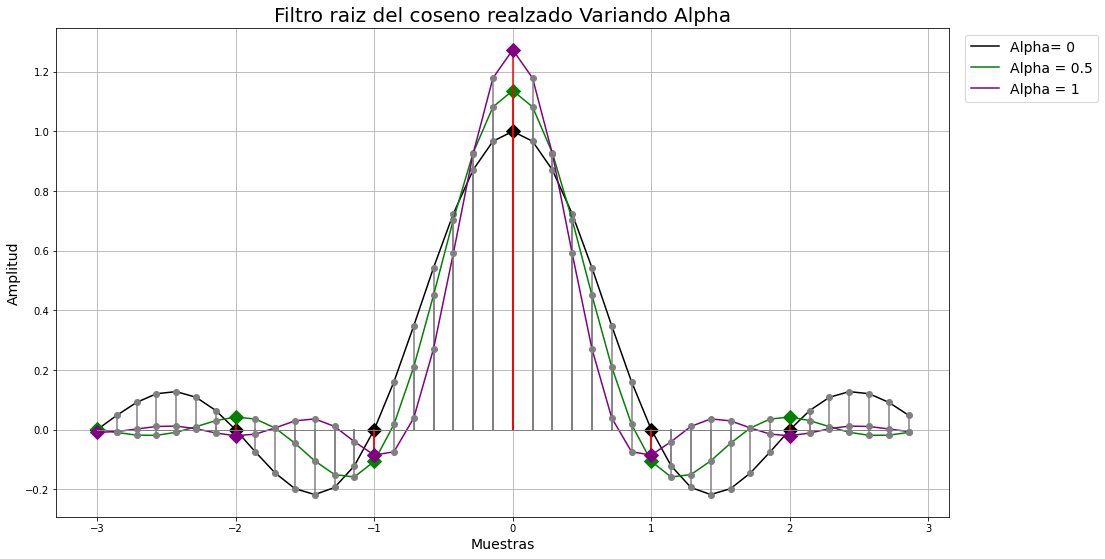

In [150]:
alpha = 0.5 # Modificando Alpha
RRC1 = rrcosfilter(longitud_filtro_m, alpha=alpha, Ts=Ts, Fs=Fs)
alpha = 1 # Modificando Alpha
RRC2 = rrcosfilter(longitud_filtro_m, alpha=alpha, Ts=Ts, Fs=Fs)
Grafica_Pulse_Shaping([RRC[0],RRC1[0],RRC2[0]],[RRC[1],RRC1[1],RRC2[1]],'Filtro raiz del coseno realzado Variando Alpha',legend=['Alpha= 0','Alpha = 0.5','Alpha = 1'])

En la gráfica anterior se puede observar el efecto de Alpha. Al aumentar alpha mayor es el efecto causado en las muestras iniciales de cada bit